![This is an image](Quant-Trading.jpg)

<font size="3">
Please visit our website <a href="https://www.quant-trading.co" target="_blank">quant-trading.co</a> for more tools on quantitative finance and data science.
</font>

In [1]:
# !pip install squarify

# **HOW TO PLOT A TREEMAP FOR FINANCIAL AND ECONOMIC DATA**

## **Treemap Plot for GDP data**

<font size="3"> In information visualization and computing, treemapping is a method for displaying hierarchical data using nested figures, usually rectangles. Treemaps display hierarchical (tree-structured) data as a set of nested rectangles. Each branch of the tree is given a rectangle. Here we will show a simple use of this concept to plot GDP data of different countries in a rectangular structure. We need the library squarify to do this type of charts, so please download and install it if you don't have it. To learn more about treemaps please take a look <a href="https://en.wikipedia.org/wiki/Treemapping" target="_blank">here</a>
<br><br>

In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import wb
import datetime
import squarify

## **Basic example**

<font size="3"> Here we can use some fake data to explain how it works. Suppose you have 4 groups and each group is composed by different persons. You would like to plot those groups based on their size. 
<br><br>

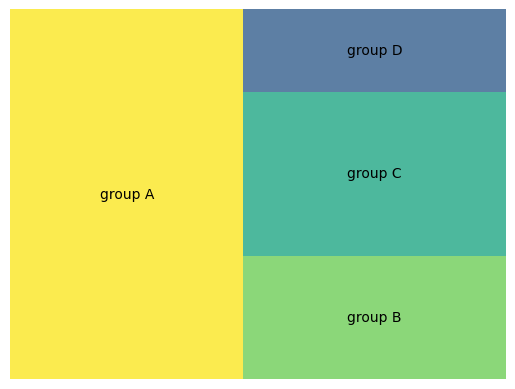

In [3]:
# Create a data frame with fake data
df = pd.DataFrame({'number_of_people':[8,3,4,2], 'group':["group A", "group B", "group C", "group D"] })

# plot it
squarify.plot(sizes=df['number_of_people'], label=df['group'], alpha=.8 )
plt.axis('off')
plt.show()

## **Create a treemap plot for the GDP of the 5 biggest countries**

   
<font size="3"> We can use a treemap plot, to compare the GDP of different countries. For example, we can take the GDP of the top 5 countries and plot those numbers to compare. <font size="3"> In a previous <a href="https://quant-trading.co/how-to-download-data-from-world-bank-api/" target="_blank">notebook</a>, we showed how to dowload data from the Worldbank API. There we can find the information that we need. We are basically doing the same procedure in the script below to download the data. We are also using the function pivot to create a table with the information we need. 
<br><br>

In [4]:
#Dates
start = datetime.datetime(1961, 1, 1)
end = datetime.datetime(2022, 12, 31)

#Countries
countries = ['US','CN','JP','DE','IN']

variable = 'NY.GDP.MKTP.CD'   #You can find the codes here -> https://data.worldbank.org/indicator
variable_description = 'GDP (current US$)'  

variable_df = wb.download(indicator = variable, start=start,end=end,country = countries)
variable_df.reset_index(inplace=True)

df_TOTAL = variable_df[['country','year',variable]]
df_TOTAL = df_TOTAL.pivot('country','year',variable)
df_TOTAL.reset_index(inplace=True)
df_TOTAL.set_index('country',inplace=True)
df_TOTAL2 = df_TOTAL.T
df_TOTAL2

country,China,Germany,India,Japan,United States
year,,,,,
1961,5.005669e+10,NaN,3.923244e+10,5.350862e+10,5.633000e+11
1962,4.720919e+10,NaN,4.216148e+10,6.072302e+10,6.051000e+11
1963,5.070661e+10,NaN,4.842192e+10,6.949813e+10,6.386000e+11
1964,5.970813e+10,NaN,5.648029e+10,8.174901e+10,6.858000e+11
1965,7.043601e+10,NaN,5.955485e+10,9.095028e+10,7.437000e+11
...,...,...,...,...,...
2018,1.389491e+13,3.974443e+12,2.702930e+12,5.040881e+12,2.053306e+13
2019,1.427997e+13,3.889178e+12,2.835606e+12,5.117994e+12,2.138098e+13
2020,1.468774e+13,3.887727e+12,2.671595e+12,5.055587e+12,2.106047e+13


## **Plot the treemap**

   
<font size="3"> From the DataFrame that we just built, we will only take the last row. That is, we will take the information for 2022. We can then use the squarify.plot function to get the chart.   
<br><br>

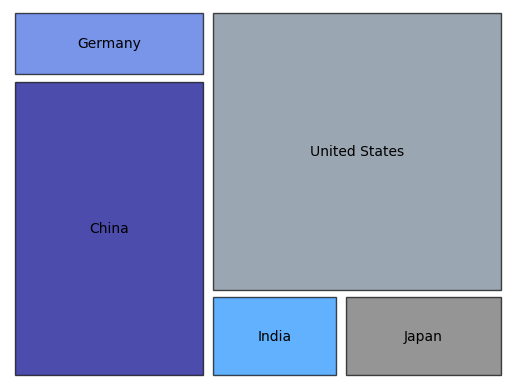

In [8]:
df_marketcap = variable_df.loc[variable_df['year']=='2022']

colors = [ 'darkblue', 'royalblue', 'dodgerblue', 'dimgrey','slategrey']

squarify.plot(sizes=df_marketcap[variable], label=df_marketcap['country'],color = colors, alpha=0.7,pad = 0.25, ec = 'black' )
plt.axis('off')
plt.show()

## **Compare 2 different dates**

   
<font size="3"> We can repeat the same procedure and compare the information for 2 different dates. Look for example here the big differences we have for 1982 and 2022. China has grown a lot, whereas Japan and United States have shrinked in relative terms.   
<br><br>

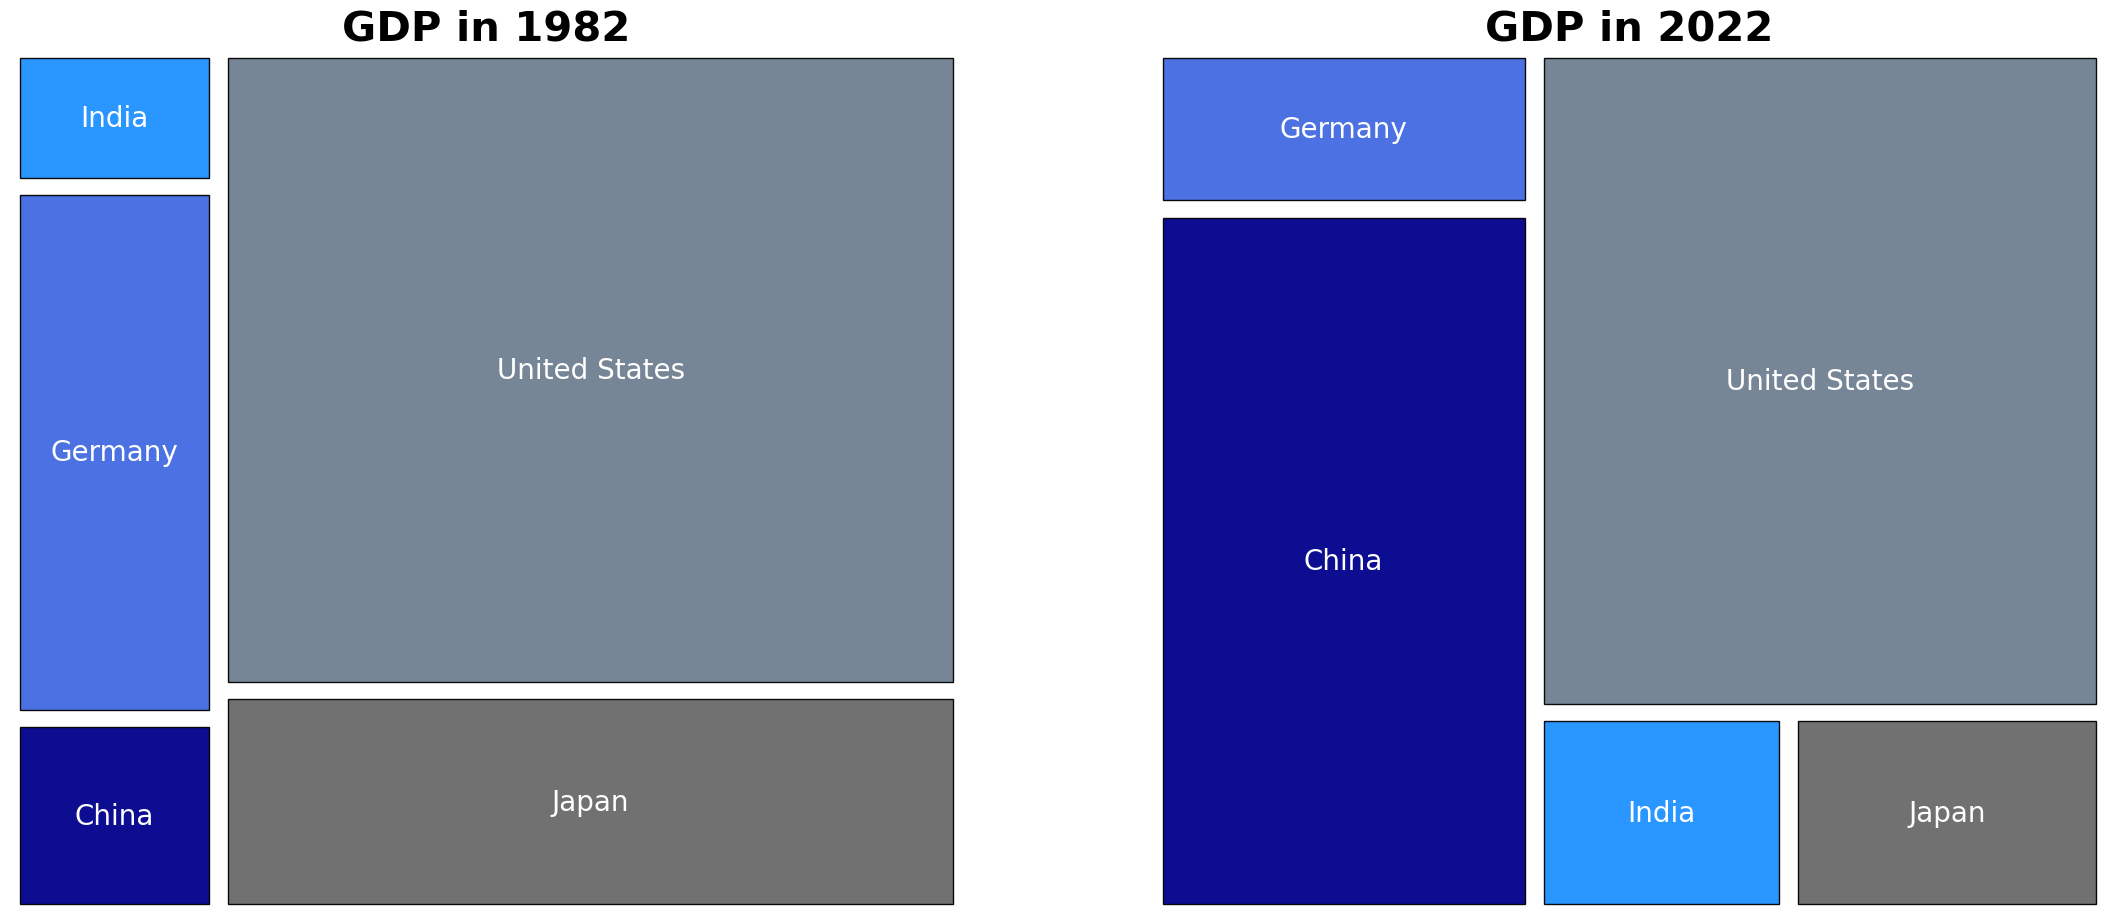

In [12]:
df_marketcap2 = variable_df.loc[variable_df['year']=='1982']

fig = plt.figure()

ax1 = fig.add_subplot(1, 2, 1)
ax1 = squarify.plot(sizes=df_marketcap2[variable], label=df_marketcap2['country'],color = colors, alpha=0.95,pad = 0.25, ec = 'black', text_kwargs = {'fontsize': 20, 'color': 'white'})
plt.axis('off')
plt.title("GDP in 1982",fontsize=30,fontweight="bold")

ax2 = fig.add_subplot(1, 2, 2)
ax2 = squarify.plot(sizes=df_marketcap[variable], label=df_marketcap['country'],color = colors, alpha=0.95,pad = 0.25, ec = 'black', text_kwargs = {'fontsize': 20, 'color': 'white'} )
plt.axis('off')
plt.title("GDP in 2022",fontsize=30,fontweight="bold")

plt.subplots_adjust(wspace = 0.2,bottom=0.1, right=3.4, top=1.9)
plt.show()

If this content is helpful and you want to make a donation please click on the button

[![paypal](https://www.paypalobjects.com/en_US/i/btn/btn_donateCC_LG.gif)](https://www.paypal.com/cgi-bin/webscr?cmd=_s-xclick&hosted_button_id=29CVY97MEQ9BY)